Enter number of years for prediction: 25


<ipython-input-9-10817760d63a>:15: RuntimeWarning: invalid value encountered in power
  return qi / (1 + b*abs(ai)*t)**(1/b)


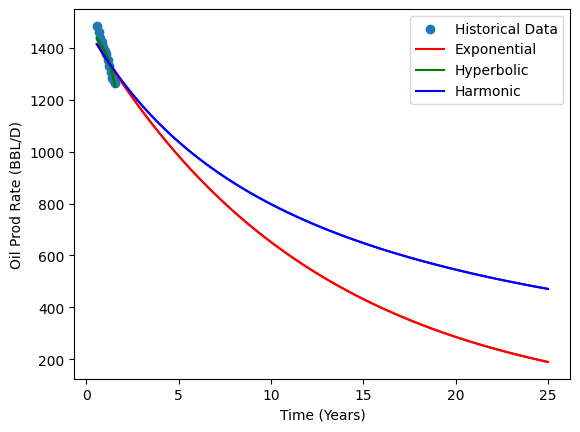

In [9]:
import numpy as np
# Imports numpy for numerical and array processing

import matplotlib.pyplot as plt
# Imports matplotlib for plotting functionality

from scipy.optimize import curve_fit
# Imports curve_fit function to fit models

# Functions to define decline curve models
def exponential_decline(t, a):
  return qi*np.exp(-a*t)

def hyperbolic_decline(t, ai, b):
  return qi / (1 + b*abs(ai)*t)**(1/b)

def harmonic_decline(t, ai):
  return qi/(1+ai*t)

# Loads data from file, skipping header row
data = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/DCA/DCA Wells/W17.txt", delimiter=",", skiprows=1)

# Splits data into time and rate columns
t = data[:,0]
q = data[:,1]

# Initial rate taken from first row
qi = q[0]

# Fits exponential model to data
popt_exp, _ = curve_fit(exponential_decline, t, q)

# Fits hyperbolic model
popt_hyp, _ = curve_fit(hyperbolic_decline, t, q)

# Fits harmonic model
popt_har, _ = curve_fit(harmonic_decline, t, q)

# Get prediction timeline from user
pred_years = float(input("Enter number of years for prediction: "))

# Create timeline based on user input
t_pred = np.linspace(min(t), pred_years, 100)

# Predictions from exponential model
q_pred_exp = exponential_decline(t_pred, popt_exp[0])

# Predictions from hyperbolic model
q_pred_hyp = hyperbolic_decline(t_pred, popt_hyp[0], popt_hyp[1])

# Predictions from harmonic model
q_pred_har = harmonic_decline(t_pred, popt_har[0])

# Plots data and predictions
plt.scatter(t, q, label='Historical Data')
plt.plot(t_pred, q_pred_exp, c='r')
plt.plot(t_pred, q_pred_hyp, c='g')
plt.plot(t_pred, q_pred_har, c='b')

# Labels axes
plt.xlabel('Time (Years)')
plt.ylabel('Oil Prod Rate (BBL/D)')
plt.legend()


plt.plot(t_pred, q_pred_exp, c='r', label='Exponential')
plt.plot(t_pred, q_pred_hyp, c='g', label='Hyperbolic')
plt.plot(t_pred, q_pred_har, c='b', label='Harmonic')

plt.legend()

# Displays plot
plt.show()